__`NOTEBOOK START`__

In [412]:
print('>>>> 📚 Importing librairies...')
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

import plotly.express as px

import plotly.graph_objs as go

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import joblib
print('>>>> ✅ ...Done')

>>>> 📚 Importing librairies...
>>>> ✅ ...Done


---------
### __1. Data discovery: 'get_around_pricing_project.csv'__
---------

In [413]:
print('>>>> 📊 Loading dataset...')
df_price = pd.read_csv('get_around_pricing_project.csv')
print('>>>> ✅ ...Done')
print()

>>>> 📊 Loading dataset...
>>>> ✅ ...Done



In [414]:
print()
print('Dataset shape: ')
display(df_price.shape)

print()
print('Display of dataset: "get_around_pricing_project" ')
print()
display(df_price.head(11))

print()
print('Main statistics: ')
print()
df_stats = df_price.describe().apply(lambda s: s.apply('{0:.2f}'.format))
display(df_stats)

print()
print ('Missing values:')
print()
# Here I created a function that will return the percentage and the quantity of missing values in our DF
def missing_values():
    
    missing = (pd.DataFrame(df_price.isnull().sum()/df_price.shape[0])*100).round(2)
    missing.columns = ['Percentage of Missing Values']
    missing['Number of Missing Values'] = pd.DataFrame(df_price.isnull().sum())
    
    return missing.sort_values(by='Percentage of Missing Values', ascending=False)

display(missing_values())


Dataset shape: 


(4843, 15)


Display of dataset: "get_around_pricing_project" 



,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183
5,5,Citroën,152352,225,petrol,black,convertible,True,True,False,False,True,True,True,131
6,6,Citroën,205219,145,diesel,grey,convertible,True,True,False,False,True,True,True,111
7,7,Citroën,115560,105,petrol,white,convertible,True,True,False,False,False,True,True,78
8,8,Peugeot,123886,125,petrol,black,convertible,True,False,False,False,False,True,True,79
9,9,Citroën,139541,135,diesel,white,convertible,False,False,False,False,True,False,True,132



Main statistics: 



,Unnamed: 0,mileage,engine_power,rental_price_per_day
count,4843.00,4843.00,4843.00,4843.00
mean,2421.00,140962.80,128.99,121.21
std,1398.20,60196.74,38.99,33.57
min,0.00,-64.00,0.00,10.00
25%,1210.50,102913.50,100.00,104.00
50%,2421.00,141080.00,120.00,119.00
75%,3631.50,175195.50,135.00,136.00
max,4842.00,1000376.00,423.00,422.00



Missing values:



,Percentage of Missing Values,Number of Missing Values
Unnamed: 0,0.0,0
model_key,0.0,0
mileage,0.0,0
engine_power,0.0,0
fuel,0.0,0
paint_color,0.0,0
car_type,0.0,0
private_parking_available,0.0,0
has_gps,0.0,0
has_air_conditioning,0.0,0


In [415]:
df_price.nunique()

Unnamed: 0                   4843
model_key                      28
mileage                      4786
engine_power                   61
fuel                            4
paint_color                    10
car_type                        8
private_parking_available       2
has_gps                         2
has_air_conditioning            2
automatic_car                   2
has_getaround_connect           2
has_speed_regulator             2
winter_tires                    2
rental_price_per_day          220
dtype: int64

In [416]:
# The column does not have interesting input in our df, so we dropping it
df_price = df_price.drop('Unnamed: 0', axis = 1)

In [417]:
df_price.columns

Index(['model_key', 'mileage', 'engine_power', 'fuel', 'paint_color',
       'car_type', 'private_parking_available', 'has_gps',
       'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
       'has_speed_regulator', 'winter_tires', 'rental_price_per_day'],
      dtype='object')

In [418]:
# I'm initializing the figure number that will be displayed next to the title in the graphs
fig_number = 0

# I create a function I'll be able to call each time I need to plot a graph
def histogram_plot(columns):
               
    global fig_number
    
    # I create a for loop to go through each column
    for column in columns:

        # To be able to reference each figure created....
        # ....I give them a number and each time the function will be called, it will be incremented by one
        fig_number += 1
        fig_number_updated = fig_number
    
        fig = px.histogram(df_price, x=column, color=column)

        # I set the layout to have a nice figure to read
        fig.update_layout(
            height=650,
            title=f'Representation of the column: <b>{column.upper()}</b> - <i>fig.{fig_number_updated}</i>',
            title_font={"size": 20},
            xaxis_tickfont_size=14,
            yaxis_tickfont_size=14,
            xaxis={'title': column.upper(), 'title_font': {'size': 16}},
            yaxis={'title': 'FREQUENCIES', 'title_font': {'size': 16}}
        )

        # Show the bar plot figures
        fig.show()

In [419]:
histogram_plot(['model_key',
 'fuel',
 'paint_color',
 'car_type',
 'private_parking_available',
 'has_gps',
 'has_air_conditioning',
 'automatic_car',
 'has_getaround_connect',
 'has_speed_regulator',
 'winter_tires',])

__OBSERVATIONS__<br><br>


* Top 3 brands: 
    - Citroën at 20%
    - Renault at 19% 
    - BMW at 17%<br><br>
* 96% of the fleet is composed of Diesel vehicules<br><br>
* Top 3 vehicules colors: 
    - Black at 33%
    - Grey at 24%
    - Blue at 14%<br><br>
* Top 3 vehicule types:
    - Estate at 33%
    - Sedan at 24%
    - SUV at 22%<br><br>
* Most of the cars have a private parking available at 55%.<br><br>
* Almost all cars are:
    - equiped with a GPS at 79% 
    - have Air Conditionning and are Automatic at 80% 
    - have a speed regulator at 76%
    - equiped with winter tires at 93%<br><br>
* 54% of all cars are equiped with Getaround Connect. 

In [420]:
columns = ['fuel', 'model_key']
# delete when there are less than 10 cars for a specific brand and less than 10 of a specific fuel type
for column in columns:
    counts = df_price[column].value_counts()
    mask = df_price[column].isin(counts[counts > 10].index)
    df_price = df_price.loc[mask]

In [421]:
def box_plot(columns):

    for column in columns:

        fig = px.box(df_price, x=column, notched=True)

        # Setting the layout of the figure
        fig.update_layout(
            height=700,
            title=f'Box Plot representation of the column: <b>{column.upper()}</b>',
            title_font={'size': 20},
            xaxis_tickfont_size=14,
            yaxis_tickfont_size=14,
            xaxis={'title': column.upper(), 'title_font': {'size': 16}},
            yaxis={'title': 'FREQUENCIES', 'title_font': {'size': 16}}
        )

        # Show the box plot figure
        fig.show()

In [422]:
box_plot(['mileage', 'engine_power', 'rental_price_per_day'])

In [423]:
columns = ['mileage', 'engine_power', 'rental_price_per_day']

# Calculate the mean and standard deviation of the list
mean = df_price[columns].mean()
std = df_price[columns].std()

for index, row in df_price[columns].iterrows():
    
    # Check if any of the values in the row are outside the range
    if any(row < mean - 3*std) or any(row > mean + 3*std):
        # Drop the row if any values are outside the range
        df_price.drop(index, inplace=True)

In [424]:
px.histogram(df_price, 
             x='mileage', 
             nbins = 50)

In [425]:
px.histogram(df_price, 
             x='engine_power', 
             nbins = 50)

In [426]:
px.histogram(df_price, 
             x='rental_price_per_day', 
             nbins = 50)

C:\Users\zouao\AppData\Local\Temp\ipykernel_17240\3378947596.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

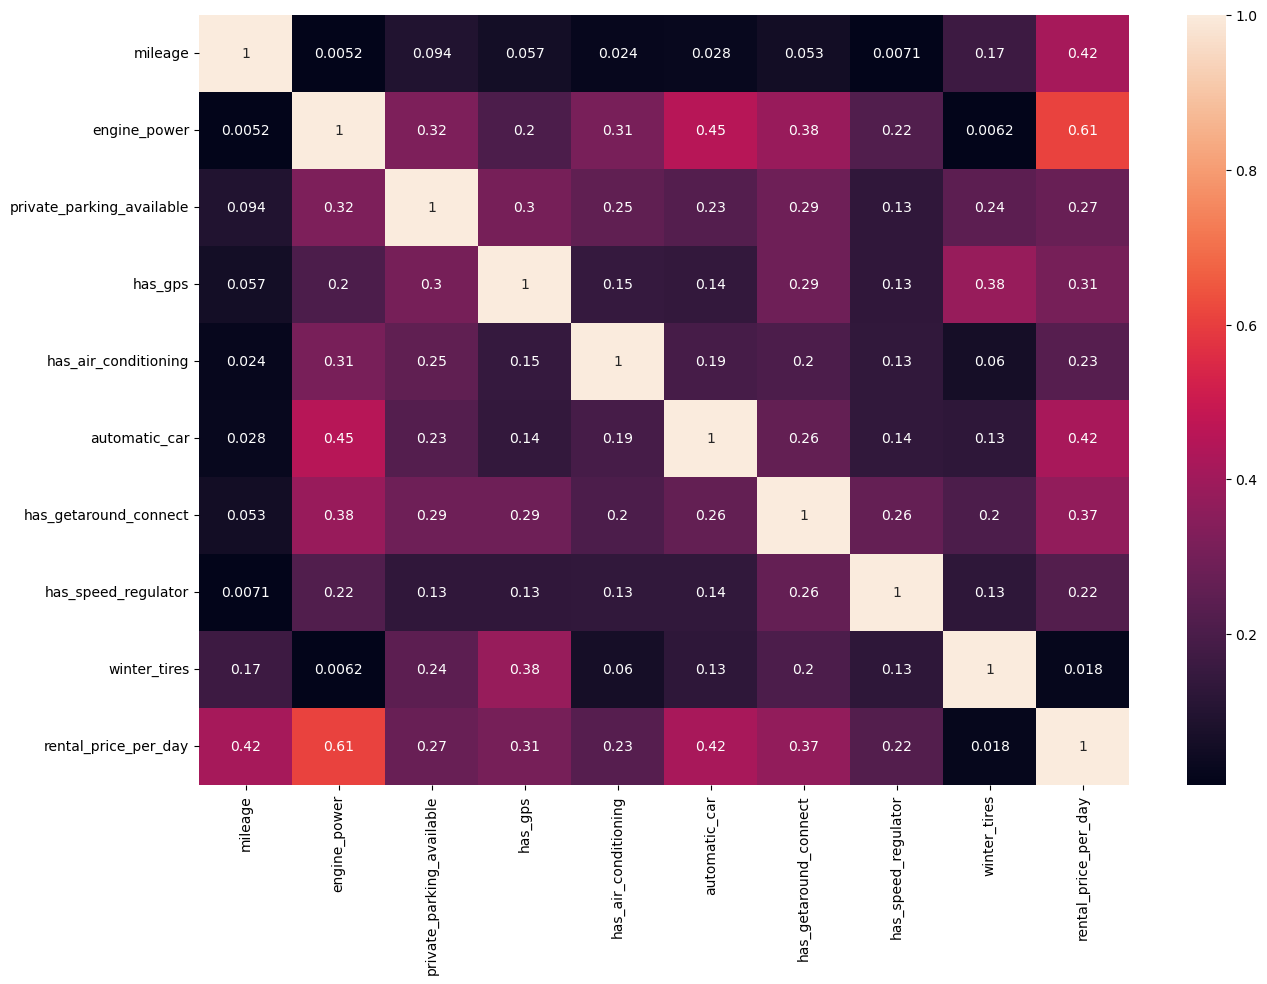

In [427]:
plt.figure(figsize=(15,10))
cm = df_price.corr()
sns.heatmap(abs(cm), annot=True)

__FIGURES INTERPRETATION__<br><br>


* As one aspect of our project problematic is about revenue, if we focus on what the rental price is correleteted to, its seems that the engine_power and the car having an automatic transmission are two main characteristics that impact the price.

In [428]:
df_price.to_pickle('price_analysis_df_clean.csv')

---------
### __2. Data discovery: 'get_around_delay_analysis.xlsx'__
---------

In [429]:
df_delay_analysis = pd.read_excel('get_around_delay_analysis.xlsx')

In [430]:
print()
print('Dataset shape: ')
display(df_delay_analysis.shape)
print()
print('Display of dataset: "get_around_delay_analysis" ')
print()
display(df_delay_analysis.head(11))

print()
print('Main statistics: ')
print()
df_stats = df_delay_analysis.describe().apply(lambda s: s.apply('{0:.2f}'.format))
display(df_stats)

print()
print ('Missing values:')
print()
# Here I created a function that will return the percentage and the quantity of missing values in our DF
def missing_values():
    
    missing = (pd.DataFrame(df_delay_analysis.isnull().sum()/df_delay_analysis.shape[0])*100).round(2)
    missing.columns = ['Percentage of Missing Values']
    missing['Number of Missing Values'] = pd.DataFrame(df_delay_analysis.isnull().sum())
    
    return missing.sort_values(by='Percentage of Missing Values', ascending=False)

display(missing_values())
print()
print('Features description: ')
df_doc = pd.read_excel('get_around_delay_analysis.xlsx', 'Documentation')
with pd.option_context('display.max_colwidth', None):
    display(df_doc)


Dataset shape: 


(21310, 7)


Display of dataset: "get_around_delay_analysis" 



,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
5,511626,398802,mobile,ended,-203.0,NaN,NaN
6,511639,370585,connect,ended,-15.0,563782.0,570.0
7,512303,371242,mobile,ended,-44.0,NaN,NaN
8,512475,322502,mobile,canceled,NaN,NaN,NaN
9,513434,256528,connect,ended,23.0,NaN,NaN



Main statistics: 



,rental_id,car_id,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.00,21310.00,16346.00,1841.00,1841.00
mean,549712.88,350030.60,59.70,550127.41,279.29
std,13863.45,58206.25,1002.56,13184.02,254.59
min,504806.00,159250.00,-22433.00,505628.00,0.00
25%,540613.25,317639.00,-36.00,540896.00,60.00
50%,550350.00,368717.00,9.00,550567.00,180.00
75%,560468.50,394928.00,67.00,560823.00,540.00
max,576401.00,417675.00,71084.00,575053.00,720.00



Missing values:



,Percentage of Missing Values,Number of Missing Values
previous_ended_rental_id,91.36,19469
time_delta_with_previous_rental_in_minutes,91.36,19469
delay_at_checkout_in_minutes,23.29,4964
rental_id,0.00,0
car_id,0.00,0
checkin_type,0.00,0
state,0.00,0



Features description: 


,field name,Comment
0,rental_id,Unique identifier of the rental
1,car_id,Unique identifier of the car
2,checkin_type,"Flow used for both checkin and checkout. (ie. access and return the car)\nmobile = rental agreement signed on the owner's smartphone\nconnect = car equiped with the Connect technology , opened by the driver with his smartphone.\nNote: paper contracts were excluded from the data as we have no data on their delay at checkout and it's negligible use case"
3,state,canceled means that the rental did not happen (was canceled by the driver or the owner).
4,delay_at_checkout_in_minutes,Difference in minutes between the rental end time requested by the driver when booking the car and the actual time the driver completed the checkout. Negative values mean that the driver returned the car in advance.
5,previous_ended_rental_id,id of the previous ended rental of the car (NULL when no previous rental or delay with previous rental higher than 12 hours)
6,time_delta_with_previous_rental_in_minutes,"Difference in minutes between this rental planned start time and the previous rental planned end time (when lower than 12 hours, NULL if higher)"


<Axes: title={'center': 'DF HEATMAP'}>

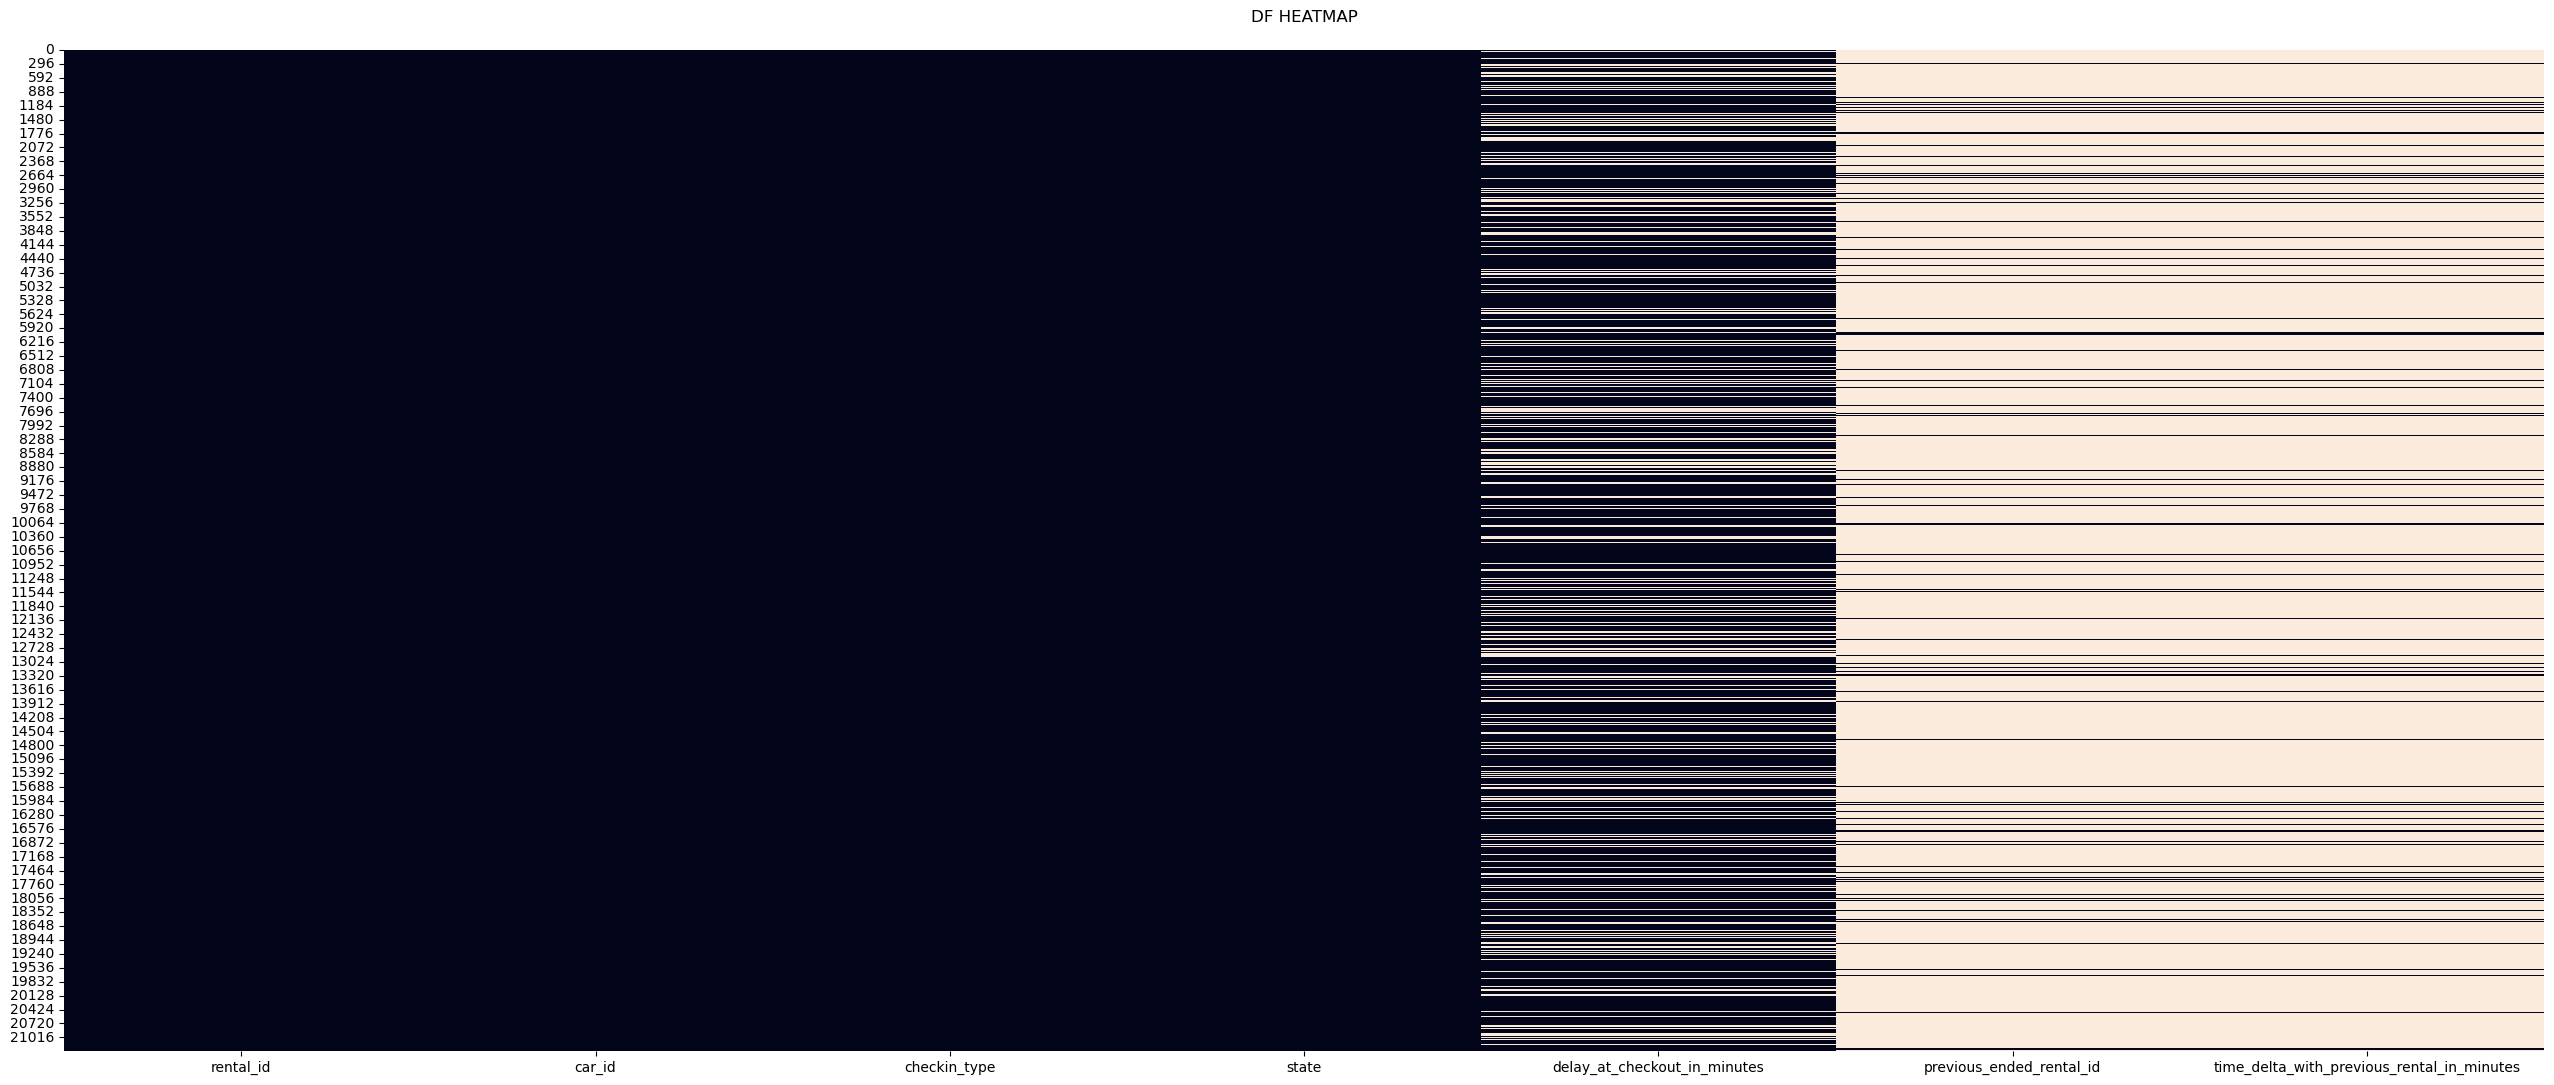

In [432]:
# Creating a figure to have a bigger heatmap
plt.figure(figsize =(32,13))

# Setting up the title
plt.title("DF HEATMAP", y=1.02)

# Creating the heatmap. 
# In black are the rows that contains values. In beige are the rows with missing values.
sns.heatmap(df_delay_analysis.isnull(), cbar=False)

__OBSERVATION__<br><br>

* We have 3 features with quite some values missing: 
    - 'previous_ended_rental_id': 91.36% missing
    - 'time_delta_with_previous_rental_in_minutes':	91.36% missing
    - 'delay_at_checkout_in_minutes': 23.29% missing

In [435]:
df_delay_analysis_by_type= pd.DataFrame(round(
    df_delay_analysis.groupby('checkin_type')
    ['delay_at_checkout_in_minutes'].count()
    /len(df_delay_analysis['delay_at_checkout_in_minutes'])*100, 2))

df_delay_analysis_by_type

,delay_at_checkout_in_minutes
checkin_type,
connect,15.96
mobile,60.74


In [436]:
px.histogram(df_delay_analysis, 
       x='state', 
       color='checkin_type', 
       title = 'Rental States',)

__OBSERVATION__<br><br>

* Most rentals concerned by a cancelation are the ones done by mobile, at 2467, which necessitate for the person renting the car to actually meet the owner to sign the agreement of his phone.<br><br>
* We have less cancelation with the Connect Checkin type at 798.

---------
### __3. Going deeper__
---------

In our previous data frame 'get_around_delay_analysis', we had information about delays taking place at the checkout phase but we lack information at the checkin phase. Having this information will allow us to precisely pinpoint how many rental are concerned by our problematic. Thankfully, we can extract this information from the DF we have.

In order to do so, we'll create new features. We have information about the current rental delay at checkout for instance but not much about the previous rental. That's why we are going to extract this information by merging the DF within itself by looking for the 'previous_ended_rental_id' within the 'rental_id' column.

In [438]:
df_delay_analysis_2 = df_delay_analysis.merge(df_delay_analysis[['rental_id','delay_at_checkout_in_minutes']], left_on='previous_ended_rental_id', right_on='rental_id', how='left')
df_delay_analysis_2

,rental_id_x,car_id,checkin_type,state,delay_at_checkout_in_minutes_x,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,rental_id_y,delay_at_checkout_in_minutes_y
0,505000,363965,mobile,canceled,NaN,NaN,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
21305,573446,380069,mobile,ended,NaN,573429.0,300.0,573429.0,NaN
21306,573790,341965,mobile,ended,-337.0,NaN,NaN,NaN,NaN
21307,573791,364890,mobile,ended,144.0,NaN,NaN,NaN,NaN
21308,574852,362531,connect,ended,-76.0,NaN,NaN,NaN,NaN


Now, we can calculate the delay at the checkout phase for the previous_ended_rental_id. 

With this new information, we'll be able to determine the delay at the checkin phase by stubstracting the 'time_delta_with_previous_rental_in_minutes' from the 'previous_ended_rental_checkout_delay'.

In [439]:
# we set the values of delay_at_checkout_in_minutes at 0 if the delay is under or equal to 0. This way we only have actual delays, as the Word Doc mentionned
df_delay_analysis_2['delay_at_checkout_in_minutes'] = df_delay_analysis_2['delay_at_checkout_in_minutes_x'].apply(lambda x : x if x > 0 else 0)

# we create a new column to indicate that there is a delay at checkout when values are above 0
df_delay_analysis_2['delay_at_checkout'] = df_delay_analysis_2['delay_at_checkout_in_minutes'].apply(lambda x : 'yes' if x > 0 else 'no')

# we do the same operation as for the column 'delay_at_checkout_in_minutes'
df_delay_analysis_2['previous_ended_rental_checkout_delay'] = df_delay_analysis_2['delay_at_checkout_in_minutes_y'].apply(lambda x : x if x > 0 else 0)

# we can now calculate the delay at checkin by substracting 'time_delta_with_previous_rental_in_minutes' from 'previous_ended_rental_checkout_delay'
df_delay_analysis_2['delay_at_checkin_in_minutes'] = df_delay_analysis_2['previous_ended_rental_checkout_delay'] - df_delay_analysis_2['time_delta_with_previous_rental_in_minutes']

# now when the values are under or equal to 0, we set them to 0
df_delay_analysis_2['delay_at_checkin_in_minutes'] = df_delay_analysis_2['delay_at_checkin_in_minutes'].apply(lambda x : x if x > 0 else 0)

# same operation as for the 'delay_at_checkout' column
df_delay_analysis_2['delay_at_checkin'] = df_delay_analysis_2['delay_at_checkin_in_minutes'].apply(lambda x : 'yes' if x > 0 else 'no')

# finally, we drop the unnessary columns
df_delay_analysis_2.drop(columns=['delay_at_checkout_in_minutes_y','delay_at_checkout_in_minutes_x','rental_id_y' ], inplace = True)
df_delay_analysis_2

,rental_id_x,car_id,checkin_type,state,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay_at_checkout_in_minutes,delay_at_checkout,previous_ended_rental_checkout_delay,delay_at_checkin_in_minutes,delay_at_checkin
0,505000,363965,mobile,canceled,NaN,NaN,0.0,no,0.0,0.0,no
1,507750,269550,mobile,ended,NaN,NaN,0.0,no,0.0,0.0,no
2,508131,359049,connect,ended,NaN,NaN,70.0,yes,0.0,0.0,no
3,508865,299063,connect,canceled,NaN,NaN,0.0,no,0.0,0.0,no
4,511440,313932,mobile,ended,NaN,NaN,0.0,no,0.0,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...
21305,573446,380069,mobile,ended,573429.0,300.0,0.0,no,0.0,0.0,no
21306,573790,341965,mobile,ended,NaN,NaN,0.0,no,0.0,0.0,no
21307,573791,364890,mobile,ended,NaN,NaN,144.0,yes,0.0,0.0,no
21308,574852,362531,connect,ended,NaN,NaN,0.0,no,0.0,0.0,no


In [440]:
# we rearrange them to the following order to make more sens and ease comprehension
columns_order = ['rental_id_x', 
               'car_id', 
               'checkin_type',
               'state',
               'delay_at_checkout_in_minutes',
               'delay_at_checkout',
               'delay_at_checkin_in_minutes',
               'delay_at_checkin',
               'previous_ended_rental_id',
               'previous_ended_rental_checkout_delay',
               'time_delta_with_previous_rental_in_minutes',]
               
df_delay_analysis_2 = df_delay_analysis_2.reindex(columns=columns_order)
df_delay_analysis_2.head(11)

,rental_id_x,car_id,checkin_type,state,delay_at_checkout_in_minutes,delay_at_checkout,delay_at_checkin_in_minutes,delay_at_checkin,previous_ended_rental_id,previous_ended_rental_checkout_delay,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,0.0,no,0.0,no,NaN,0.0,NaN
1,507750,269550,mobile,ended,0.0,no,0.0,no,NaN,0.0,NaN
2,508131,359049,connect,ended,70.0,yes,0.0,no,NaN,0.0,NaN
3,508865,299063,connect,canceled,0.0,no,0.0,no,NaN,0.0,NaN
4,511440,313932,mobile,ended,0.0,no,0.0,no,NaN,0.0,NaN
5,511626,398802,mobile,ended,0.0,no,0.0,no,NaN,0.0,NaN
6,511639,370585,connect,ended,0.0,no,0.0,no,563782.0,136.0,570.0
7,512303,371242,mobile,ended,0.0,no,0.0,no,NaN,0.0,NaN
8,512475,322502,mobile,canceled,0.0,no,0.0,no,NaN,0.0,NaN
9,513434,256528,connect,ended,23.0,yes,0.0,no,NaN,0.0,NaN


Overall situation

In [441]:
# total number of delay, whatever the phase
df_delay_analysis_2['delay_at_checkin'].value_counts() + df_delay_analysis_2['delay_at_checkout'].value_counts()

no     32998
yes     9622
dtype: int64

Situation at the Checkin Phase

In [442]:
# number of rentals with and without delay at the checkin phase
df_delay_analysis_2['delay_at_checkin'].value_counts()

no     21092
yes      218
Name: delay_at_checkin, dtype: int64

In [443]:
# proportion of rental concerned by a delay at the checkin phase
mask_1 = df_delay_analysis_2['delay_at_checkin'] == 'yes'
(df_delay_analysis_2[mask_1].shape[0]/df_delay_analysis_2.shape[0])*100

1.022993899577663

In [444]:
# number of rental with and without delay at the checkin phase by checkin type
df_delay_analysis_2.groupby('checkin_type')['delay_at_checkin'].value_counts()

checkin_type  delay_at_checkin
connect       no                   4238
              yes                    69
mobile        no                  16854
              yes                   149
Name: delay_at_checkin, dtype: int64

In [445]:
fig = px.histogram(df_delay_analysis_2, 
             x='delay_at_checkin',
             color='checkin_type',
             title = 'Number of Delay at the <b>Checkin</b> phase')
fig.show()

Situation at the Checkout Phase

In [446]:
# number of rental with and without delay at the checkout phase
df_delay_analysis_2.groupby('checkin_type')['delay_at_checkout'].value_counts()

checkin_type  delay_at_checkout
connect       no                   2848
              yes                  1459
mobile        no                   9058
              yes                  7945
Name: delay_at_checkout, dtype: int64

In [447]:
# number of rental with and without delay at the checkin phase
df_delay_analysis_2['delay_at_checkout'].value_counts()

no     11906
yes     9404
Name: delay_at_checkout, dtype: int64

In [448]:
# proportion of rental NOT concerned by a delay at the checkout phase
mask_2 = df_delay_analysis_2['delay_at_checkout'] == 'no'
(df_delay_analysis_2[mask_2].shape[0]/df_delay_analysis_2.shape[0])*100

55.87048334115438

In [449]:
fig = px.histogram(df_delay_analysis_2, 
             x='delay_at_checkout',
             color='checkin_type',
             title = 'Number of Delay at the <b>Checkout</b> phase')
fig.show()

In [450]:
df_delay_analysis_2.describe()

,rental_id_x,car_id,delay_at_checkout_in_minutes,delay_at_checkin_in_minutes,previous_ended_rental_id,previous_ended_rental_checkout_delay,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310.000000,21310.000000,1841.000000,21310.000000,1841.000000
mean,549712.880338,350030.603426,89.049601,1.816518,550127.411733,4.372595,279.288430
std,13863.446964,58206.249765,832.184392,95.049368,13184.023111,101.544459,254.594486
min,504806.000000,159250.000000,0.000000,0.000000,505628.000000,0.000000,0.000000
25%,540613.250000,317639.000000,0.000000,0.000000,540896.000000,0.000000,60.000000
50%,550350.000000,368717.000000,0.000000,0.000000,550567.000000,0.000000,180.000000
75%,560468.500000,394928.000000,41.000000,0.000000,560823.000000,0.000000,540.000000
max,576401.000000,417675.000000,71084.000000,12548.000000,575053.000000,12968.000000,720.000000


In [451]:
df_delay_analysis_2.to_pickle('delay_analysis_df_clean.csv')

__OBSERVATION__<br><br>

Overall observation: 
* Without taking into consideration the phase during which the delay occured, whether it's at the checkout or checkin phase, we have 32 998 rentals on time and 9622 that were late.<br><br>

Checking Phase:
* When it's time to take the car, we have very few rentals made after the set time, with only around 1%, which is 218 rentals out of the 21092 available for this phase in our DF.<br><br>
* Most of those delay are from the mobile checkin type where 149 comes from and only 69 when the car is equiped with the Connect system.<br><br>
* The average delay at the checkin phase is around 1.8 minutes<br><br>

Checkout Phase:
* We have 11 906 rentals that were late to the checkout phase which is around 56% of the rentals in our DF<br><br>
* 9 404 rentals were on time, which is around 44%.<br><br>
* Most of the delays are coming from the mobile checkin type for which you to have to meet the owner of the car.<br><br>
* The average delay at the checkout phase is around 89 minutes<br><br>

---------
### __4. What should be the minimum Threshold?__
---------

As we can see from the describe of our DF, the range of time betwen two rentals from the column 'time_delta_with_previous_rental_in_minutes' goes from 0 minutes to 720 minutes.


In [452]:
threshold = list(range(0, 750, 30))

We are going to look for if : 
1. the following rental has been canceled due to the previous checkout being done late 
2. late rentals that had no impact on the next driver

In [453]:
# return 1 if the rental has been canceled due to the previous checkout being done late
def late_checkout_with_next_rental_canceled(previous_ended_rental_checkout_delay, threshold, state, delay_at_checkin):
    return 1 if delay_at_checkin == 'yes' and state == 'canceled' and previous_ended_rental_checkout_delay < threshold else 0

# return 1 if the previous checkout as been done late 
def late_checkout(previous_ended_rental_checkout_delay, threshold, delay_at_checkin):
    return 1 if delay_at_checkin == 'yes' and previous_ended_rental_checkout_delay < threshold else 0

# now we use the functions for each row in our df
for i in threshold:
    df_delay_analysis_2[f'{i}_threshold'] = np.where(df_delay_analysis_2['time_delta_with_previous_rental_in_minutes'] < i, 1, 0)
    df_delay_analysis_2[f'{i}_rental_canceled'] = df_delay_analysis_2.apply(lambda row: late_checkout_with_next_rental_canceled(row['previous_ended_rental_checkout_delay'], i, row['state'], row['delay_at_checkin']), axis=1)
    df_delay_analysis_2[f'{i}_late_checkout'] = df_delay_analysis_2.apply(lambda row: late_checkout(row['previous_ended_rental_checkout_delay'], i, row['delay_at_checkin']), axis=1)

In [454]:
df_delay_analysis_2

,rental_id_x,car_id,checkin_type,state,delay_at_checkout_in_minutes,delay_at_checkout,delay_at_checkin_in_minutes,delay_at_checkin,previous_ended_rental_id,previous_ended_rental_checkout_delay,...,630_late_checkout,660_threshold,660_rental_canceled,660_late_checkout,690_threshold,690_rental_canceled,690_late_checkout,720_threshold,720_rental_canceled,720_late_checkout
0,505000,363965,mobile,canceled,0.0,no,0.0,no,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
1,507750,269550,mobile,ended,0.0,no,0.0,no,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
2,508131,359049,connect,ended,70.0,yes,0.0,no,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
3,508865,299063,connect,canceled,0.0,no,0.0,no,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
4,511440,313932,mobile,ended,0.0,no,0.0,no,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21305,573446,380069,mobile,ended,0.0,no,0.0,no,573429.0,0.0,...,0,1,0,0,1,0,0,1,0,0
21306,573790,341965,mobile,ended,0.0,no,0.0,no,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
21307,573791,364890,mobile,ended,144.0,yes,0.0,no,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
21308,574852,362531,connect,ended,0.0,no,0.0,no,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0


In [455]:
# we group by checkin type to get the information for the mobile and connect feature
df_by_checkin_type = df_delay_analysis_2.groupby(['checkin_type'], as_index = False).sum()

# for our vizualization, we are going to get one row for all rentals with the two types of checkin.  
df_by_checkin_type = df_by_checkin_type.append(df_by_checkin_type.iloc[0, : ] + df_by_checkin_type.iloc[1, : ], ignore_index = True)

# finally, we assign the value resulting from adding the two checking type 'connect + mobile' in a new row.
df_by_checkin_type.at[2, 'checkin_type'] = 'connect + mobile'  

df_by_checkin_type

C:\Users\zouao\AppData\Local\Temp\ipykernel_17240\475456880.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\zouao\AppData\Local\Temp\ipykernel_17240\475456880.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,checkin_type,rental_id_x,car_id,delay_at_checkout_in_minutes,delay_at_checkin_in_minutes,previous_ended_rental_id,previous_ended_rental_checkout_delay,time_delta_with_previous_rental_in_minutes,0_threshold,0_rental_canceled,...,630_late_checkout,660_threshold,660_rental_canceled,660_late_checkout,690_threshold,690_rental_canceled,690_late_checkout,720_threshold,720_rental_canceled,720_late_checkout
0,connect,2374939788,1465573987,116880.0,5136.0,4.484172e+08,21326.0,233880.0,0,0,...,67,692,18,68,723,18,68,755,18,68
1,mobile,9339441692,5993578172,1780767.0,33574.0,5.643674e+08,71854.0,280290.0,0,0,...,139,882,17,139,923,17,139,956,17,139
2,connect + mobile,11714381480,7459152159,1897647.0,38710.0,1.012785e+09,93180.0,514170.0,0,0,...,206,1574,35,207,1646,35,207,1711,35,207


In [456]:
df_by_checkin_type = pd.melt(df_by_checkin_type, id_vars=['checkin_type'], var_name= 'impact_on_rental', value_name = 'nb_of_rentals_impacted_by_threshold')
df_by_checkin_type

,checkin_type,impact_on_rental,nb_of_rentals_impacted_by_threshold
0,connect,rental_id_x,2.374940e+09
1,mobile,rental_id_x,9.339442e+09
2,connect + mobile,rental_id_x,1.171438e+10
3,connect,car_id,1.465574e+09
4,mobile,car_id,5.993578e+09
...,...,...,...
241,mobile,720_rental_canceled,1.700000e+01
242,connect + mobile,720_rental_canceled,3.500000e+01
243,connect,720_late_checkout,6.800000e+01
244,mobile,720_late_checkout,1.390000e+02


In [457]:
# we check if the rows in the column 'impact_on_rental' contain the word threshold
# and we make sure that this check is not case sensitive or treated as a regular expression
df_threshold_analysis = df_by_checkin_type[df_by_checkin_type['impact_on_rental'].str.contains('threshold', case=False, regex=False)]

# we split and extract the first element
df_threshold_analysis['threshold'] = df_threshold_analysis['impact_on_rental'].str.split('_').str[0]

# we reset the index in order for the DF to strart from 0
df_threshold_analysis = df_threshold_analysis.reset_index(drop=True)

# we drop an uncessary column
df_threshold_analysis = df_threshold_analysis.drop('impact_on_rental', axis=1) 

# we rearrange the column to the following order to make more sens and ease comprehension
columns_order = ['checkin_type', 
               'threshold', 
               'nb_of_rentals_impacted_by_threshold']
               
df_threshold_analysis = df_threshold_analysis.reindex(columns=columns_order)

df_threshold_analysis
# saving this df for our dashboard on streamlit
df_threshold_analysis.to_pickle('threshold_analysis_df_clean.csv')

C:\Users\zouao\AppData\Local\Temp\ipykernel_17240\1390829789.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [458]:
fig = px.line (df_threshold_analysis,
         x = 'threshold',
         y = 'nb_of_rentals_impacted_by_threshold',
         color = 'checkin_type', 
         text = 'nb_of_rentals_impacted_by_threshold',
           )

fig.update_traces(textposition = 'bottom right')

fig.update_layout(
    height=700,
    title = '<b>Overall impact of thresholds on rentals</b>',
    title_font={'size': 20}, 
    xaxis={'title': 'Threshold in minutes', 'title_font': {'size': 16}},
    yaxis={'title': 'Number of rentals impacted', 'title_font': {'size': 16}},
)

We are doing the same operation to look for the impact of the threshold on canceled rentals.

In [459]:
# we check if the rows in the column 'impact_on_rental' contain the word 'canceled'
# and we make sure that this check is not case sensitive or treated as a regular expression
df_cancelation_analysis = df_by_checkin_type[df_by_checkin_type['impact_on_rental'].str.contains('canceled', case=False, regex=False)]

# we split and extract the first element
df_cancelation_analysis['threshold'] = df_cancelation_analysis['impact_on_rental'].str.split('_').str[0]

# we reset the index in order for the DF to strart from 0
df_cancelation_analysis = df_cancelation_analysis.reset_index(drop=True)

# we drop an uncessary column
df_cancelation_analysis = df_cancelation_analysis.drop('impact_on_rental', axis=1) 

# we rearrange them to the following order to make more sens and ease comprehension
columns_order = ['checkin_type', 
               'threshold', 
               'nb_of_rentals_impacted_by_threshold']
               
df_cancelation_analysis = df_cancelation_analysis.reindex(columns=columns_order)

# saving this df for our dashboard on streamlit
df_cancelation_analysis.to_pickle('cancelation_threshold_analysis_df_clean.csv')

df_cancelation_analysis



C:\Users\zouao\AppData\Local\Temp\ipykernel_17240\516371287.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,checkin_type,threshold,nb_of_rentals_impacted_by_threshold
0,connect,0,0.0
1,mobile,0,0.0
2,connect + mobile,0,0.0
3,connect,30,2.0
4,mobile,30,4.0
...,...,...,...
70,mobile,690,17.0
71,connect + mobile,690,35.0
72,connect,720,18.0
73,mobile,720,17.0


In [460]:
fig = px.line (df_cancelation_analysis,
         x = 'threshold',
         y = 'nb_of_rentals_impacted_by_threshold',
         color = 'checkin_type', 
         text = 'nb_of_rentals_impacted_by_threshold',
           )

fig.update_traces(textposition = 'bottom right')

fig.update_layout(
    height=700,
    title = '<b>Canceled rentals avoided by thresholds</b>',
    title_font={'size': 20}, 
    xaxis={'title': 'Threshold in minutes', 'title_font': {'size': 16}},
    yaxis={'title': 'Number of rentals impacted', 'title_font': {'size': 16}},
)

Finally, we repeat the operation again to check the number of rentals that will not be impacted by the previous rental delay at checkout depending on the thresholds in minutes chosed.

In [461]:
# we check if the rows in the column 'impact_on_rental' contain the word 'late'
# and we make sure that this check is not case sensitive or treated as a regular expression
df_late_checkout_analysis = df_by_checkin_type[df_by_checkin_type['impact_on_rental'].str.contains('late', case=False, regex=False)]

# we split and extract the first element
df_late_checkout_analysis['threshold'] = df_late_checkout_analysis['impact_on_rental'].str.split('_').str[0]

# we reset the index in order for the DF to strart from 0
df_late_checkout_analysis = df_late_checkout_analysis.reset_index(drop=True)

# we drop an uncessary column
df_late_checkout_analysis = df_late_checkout_analysis.drop('impact_on_rental', axis=1) 

# we rearrange them to the following order to make more sens and ease comprehension
columns_order = ['checkin_type', 
               'threshold', 
               'nb_of_rentals_impacted_by_threshold']
               
df_late_checkout_analysis = df_late_checkout_analysis.reindex(columns=columns_order)

df_late_checkout_analysis
# saving this df for our dashboard on streamlit
df_late_checkout_analysis.to_pickle('late_checkout_threshold_analysis_df_clean.csv')

C:\Users\zouao\AppData\Local\Temp\ipykernel_17240\648076554.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [462]:
fig = px.line (df_late_checkout_analysis,
         x = 'threshold',
         y = 'nb_of_rentals_impacted_by_threshold',
         color = 'checkin_type', 
         text = 'nb_of_rentals_impacted_by_threshold',
           )

fig.update_traces(textposition = 'bottom right')

fig.update_layout(
    height=700,
    title = '<b>Rentals not impacted by the previous rental delay during the checkout depending on the thresholds</b>',
    title_font={'size': 20}, 
    xaxis={'title': 'Threshold in minutes', 'title_font': {'size': 16}},
    yaxis={'title': 'Number of rentals impacted', 'title_font': {'size': 16}},
)

In [463]:
df_threshold_analysis['owner_revenue_affected_by_threshold'] = round(df_threshold_analysis['nb_of_rentals_impacted_by_threshold'] / df_delay_analysis.shape[0] * 100, 2)
df_threshold_analysis
# saving this df for our dashboard on streamlit
df_threshold_analysis.to_pickle('revenue_threshold_impact_df_clean.csv')

In [464]:
fig = px.line (df_threshold_analysis,
         x = 'threshold',
         y = 'owner_revenue_affected_by_threshold',
         color = 'checkin_type', 
         text = 'owner_revenue_affected_by_threshold',
           )

fig.update_traces(textposition = 'bottom right')

fig.update_layout(
    height=700,
    title = "<b>Share of owner's revenue affected by threshold</b>",
    title_font={'size': 20}, 
    xaxis={'title': 'Threshold in minutes', 'title_font': {'size': 16}},
    yaxis={'title': 'Proportion of revenue impacted', 'title_font': {'size': 16}},
)

In [465]:
# Average rental price per day rounded by 2
average_rental_price_per_day = round(df_price['rental_price_per_day'].mean(), 2)

In [466]:
# Average rental price per minute (1440 minutes in 24h)
average_rental_price_per_minute = round(df_price['rental_price_per_day'].mean()/1440, 2)

In [467]:
# Average delay overall
average_delay_overall = round((df_delay_analysis_2['delay_at_checkout_in_minutes'] + df_delay_analysis_2['delay_at_checkin_in_minutes']).mean(), 2)

In [468]:
# total number of rentals concerned by a delay
total_number_of_rentals_with_delay = round((df_delay_analysis_2['delay_at_checkout'].value_counts().values[0] + df_delay_analysis_2['delay_at_checkin'].value_counts().values[0]), 2)

In [469]:
average_loss_in_revenue_per_day = (round(average_rental_price_per_minute * average_delay_overall, 2)) * total_number_of_rentals_with_delay

In [470]:
average_loss_in_revenue_per_day_per_car = round(average_loss_in_revenue_per_day/total_number_of_rentals_with_delay, 2)

In [471]:
print(f'The average price per day for a rental is: {average_rental_price_per_day}$')
print()
print(f'The average price per minute: {average_rental_price_per_minute}$')
print()
print(f'The average delay for all types of checking phase: {average_delay_overall} minutes')
print()
print(f'The average loss in revenue per day is: {average_loss_in_revenue_per_day}$')
print()
print(f'The average loss in revenue per day and per car late at any checking phase is: {average_loss_in_revenue_per_day_per_car}$')

The average price per day for a rental is: 120.25$

The average price per minute: 0.08$

The average delay for all types of checking phase: 90.87 minutes

The average loss in revenue per day is: 239895.46$

The average loss in revenue per day and per car late at any checking phase is: 7.27$


__`NOTEBOOK END`__